<a href="https://colab.research.google.com/github/williammcintosh/machine_learning_projects/blob/main/Keras_TF_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras and TensorFlow Regression

### Author

Will McIntosh

### Purpose

This model will cover the basics of data exploration and use of Keras and Tensor flow to predict the cost of a house.

### Dataset

This is from [the Kings County Kaggle dataset](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv).

In [1]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Ignore Matplotlib warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Get the Dataset
df = pd.read_csv('https://drive.google.com/uc?export=download&id=17MBXf_01vmI9iDkBzkF9YcEbvmIQ8RMW')

## Data Exploration

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [4]:
#Removing unhelpful columns
df = df.drop('id', axis=1)

#convert 'date' from string to datetime object
df['date'] = pd.to_datetime(df['date'])

#Extract year and month components
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

#Remove unwanted date column
df = df.drop('date', axis=1)

#There are too many of these to make a dummy variable
df = df.drop('zipcode', axis=1)

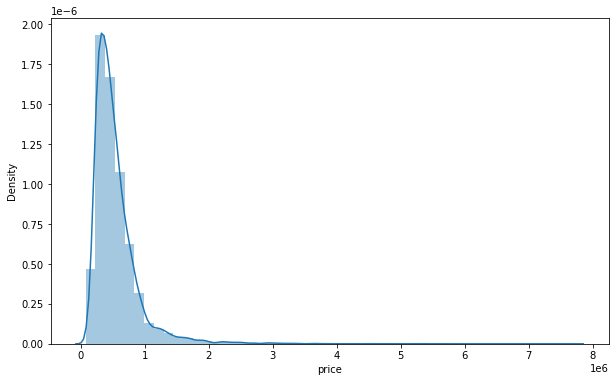

In [5]:
#Examining Price Distribution. It's very right skewed, so we'll need to remove some outliers
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

In [6]:
#Notice here that 'sqft_living' has a strong correlation to price of the house
df.corr()['price'].sort_values()

month           -0.010081
year             0.003576
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

## Removing Outliers

In [7]:
df.sort_values('price', ascending=False).head(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
7252,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,47.6298,-122.323,3940,8800,2014,10
3914,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,47.6500,-122.214,3930,25449,2014,6
9254,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,47.6305,-122.240,4540,42730,2014,9
4411,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,47.6289,-122.233,3560,24345,2014,8
1448,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,47.6232,-122.220,4600,21750,2015,4
1315,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,47.5631,-122.210,4320,24619,2015,4
1164,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,47.6767,-122.211,3430,26788,2014,10
8092,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,47.5570,-122.210,3270,10454,2014,6
2626,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,47.7493,-122.280,3030,23408,2014,8
8638,4489000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,47.6208,-122.219,3720,14592,2014,6


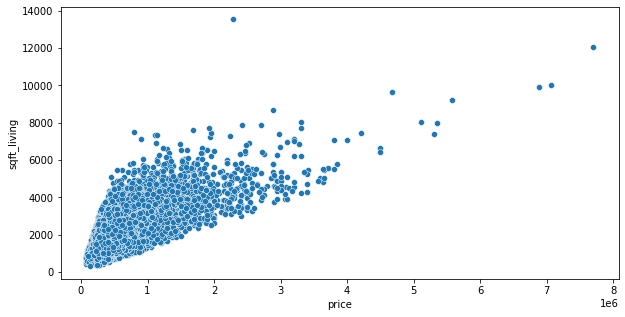

In [8]:
#Visualizing the correlation of the sqft_living space feature
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='sqft_living', data=df)

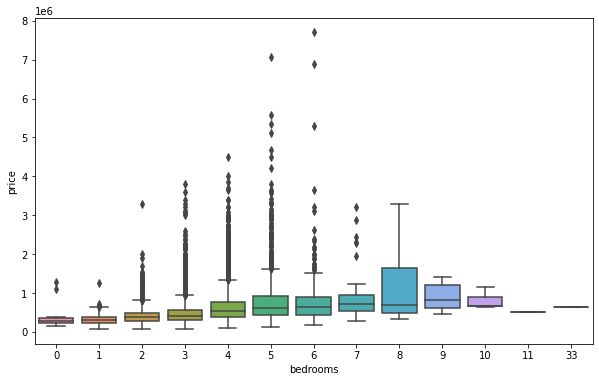

In [9]:
#This shows the distribution of prices per bedroom.
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms', y='price', data=df)

In [10]:
#Drop really expensive outlier houses
len(df)

21613

In [11]:
# Get the bottom 99%
ninety_nine_p_df = df.sort_values('price', ascending=False).iloc[216:]

## Exploring Lat / Long

In [12]:
#Examining the latitude and longitude

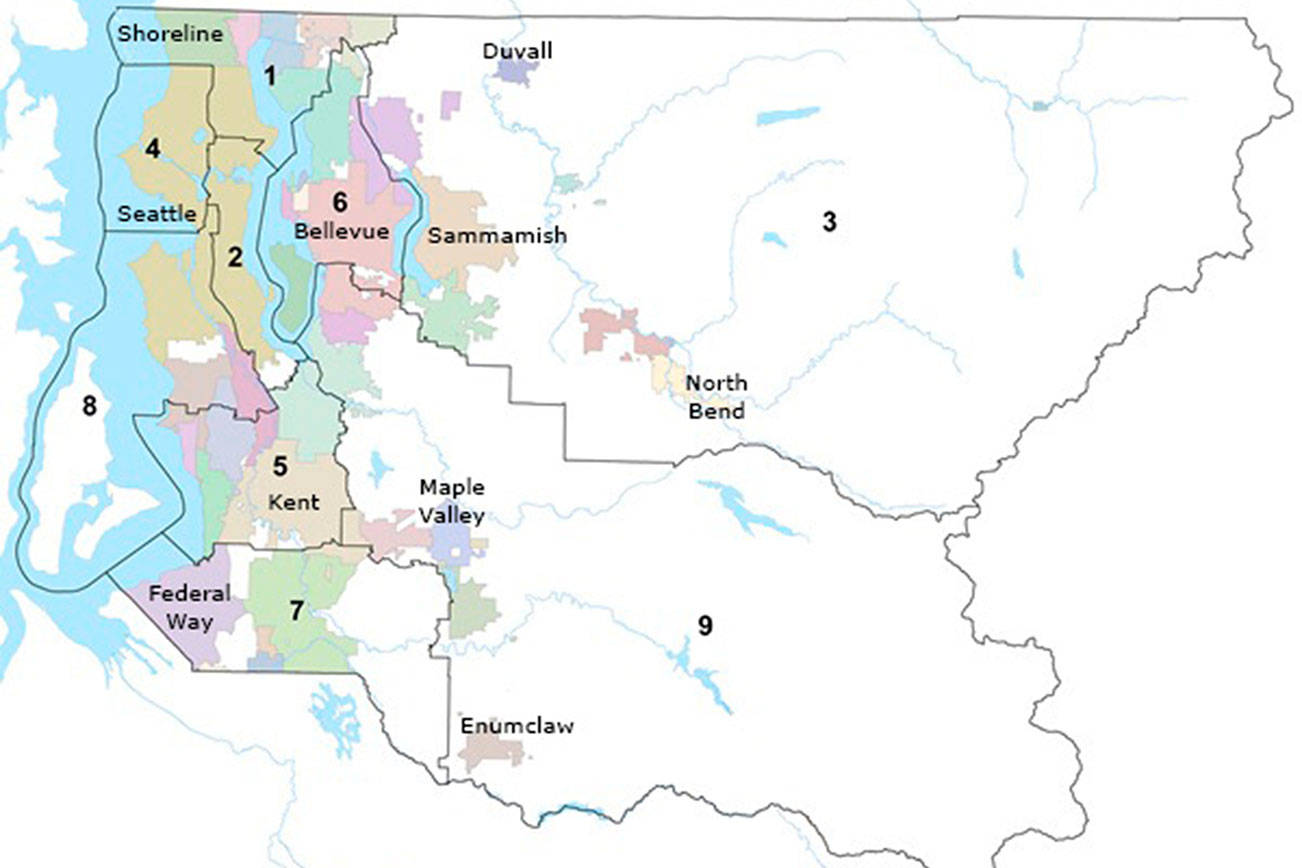

King County Council has nine members who each represent a district. Courtesy of kingcounty.gov

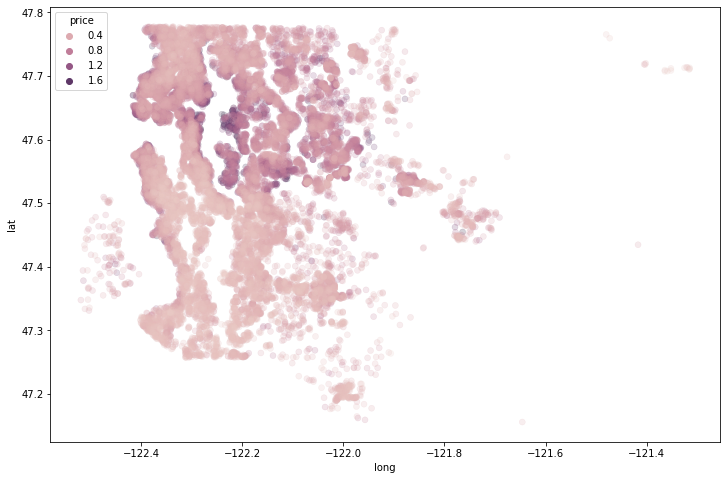

In [13]:
#Scatter plotting the longitude and latitude provide a type of map
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat',
                data=ninety_nine_p_df,
                edgecolor=None,
                alpha=0.2,
                hue='price')

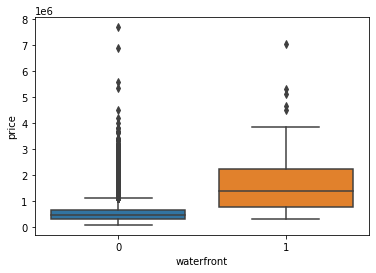

In [14]:
#Those on the waterfront are going to be more expensive
sns.boxplot(x='waterfront',y='price',data=df)

## Examining Prices by Date

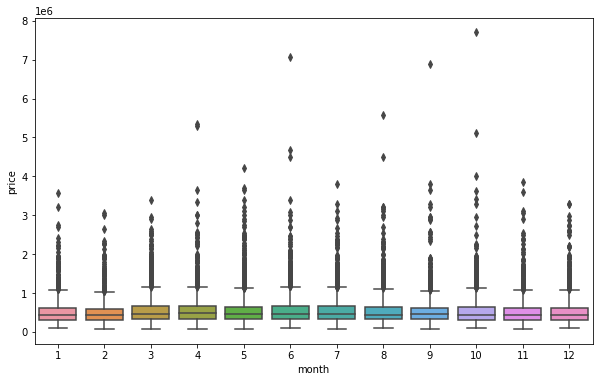

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=df)

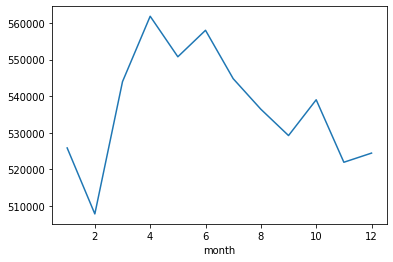

In [16]:
#The prices increases in the warmer weather by 50,000
df.groupby('month').mean()['price'].plot()

## Train and Test Split

Split the dataframe (100% data) to the test and training data sets.

In [17]:
#Convert both X and y coordinates as '.values' as Numpy arrays for TensorFlow
X = df.drop('price', axis=1).values
y = df['price'].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Fit and transform in a single step
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(15129, 19)

In [20]:
#Adding the neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

#insert 19 the X_train.shape from above
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

#A single output layer
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

#After each epoch, we will check the test data
#Keras will only use the validation data to update the weights
#Batching since the dataset is large, so we bath it
#Smaller bathces means more time, but less chance of overfitting
#Epochs are the amount of time that TensorFlow will go over the dataset
#Verbose=0 means means no output, since we plot the loss below
model.fit(x=X_train, y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,
          epochs=400,
          verbose=0)

## Explore Model History

We look at the history of the model to see its loss decreasing over each epoch.

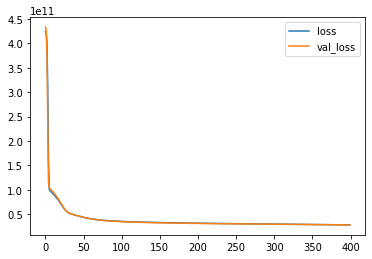

In [21]:
#Since we passed in the validation tuple,
#we not only get the loss, but we get the loss on the validation data
losses = pd.DataFrame(model.history.history)
losses.plot()

In [22]:
#After 400 epochs, the validation loss is still going down.
#If we see the values spike up, that is an indicator of overfitting.

## Evaluation on Test Data

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
predictions = model.predict(X_test)
mean_squared_error(y_test, predictions)

28174238152.747368

In [24]:
mean_absolute_error(y_test, predictions)

103279.79444835364

In [25]:
#This means our estimator is off by roughly 100k dollars.
#Is that good?
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [26]:
#Notice here the mean value of a house is 500k, so we're off by 20%.
#That's bad.
5.400881e+05

540088.1

In [27]:
#Our accuracy is around 80%
explained_variance_score(y_test, predictions)

0.7995380810107787

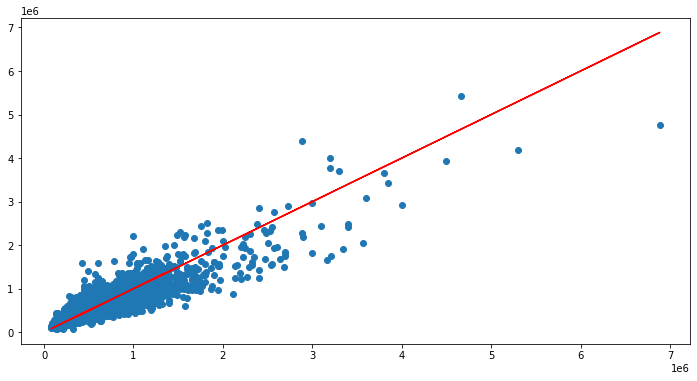

In [28]:
#The red line represents the perfect prediction line.
#We are being punished by the outlier expensive homes.
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test,y_test, 'r')

## Use the Model to Predict on a brandnew House

In [29]:
#Pick the very first house from the dataframe
single_house = df.drop('price', axis=1).iloc[0]

In [30]:
#Scale this single house data as a numpy array.
#Reshape it to be a matrix
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [31]:
model.predict(single_house)

array([[282322.62]], dtype=float32)

In [32]:
#The house is worth 221k but estimated to caost 289k.
#A difference of 70k.
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


## Retrain on the Bottom 99%

In [33]:
#Convert both X and y coordinates as '.values' as Numpy arrays for TensorFlow
X = ninety_nine_p_df.drop('price', axis=1).values
y = ninety_nine_p_df['price'].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
scaler = MinMaxScaler()

#Fit and transform in a single step
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(14977, 19)

In [36]:
#Adding the neural networks
model = Sequential()

#insert 19 the X_train.shape from above
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

#A single output layer
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(x=X_train, y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,
          epochs=400,
          verbose=0)

## Explore Model History on 99%

We look at the history of the model to see its loss decreasing over each epoch.

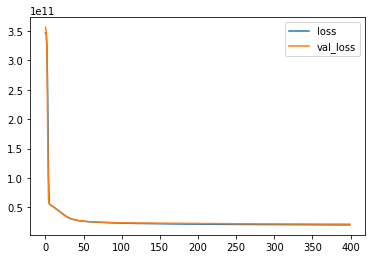

In [37]:
#Since we passed in the validation tuple,
#we not only get the loss, but we get the loss on the validation data
losses = pd.DataFrame(model.history.history)
losses.plot()

In [38]:
#After 400 epochs, the validation loss is still going down.
#If we see the values spike up, that is an indicator of overfitting.

## Evaluation on Test Data on 99%





In [39]:
predictions = model.predict(X_test)
mean_squared_error(y_test, predictions)

21497093375.564915

In [40]:
mean_absolute_error(y_test, predictions)

98693.33020529109

In [41]:
#This means our estimator is off by roughly 100k dollars.
#Is that good?
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [42]:
#Notice here the mean value of a house is 500k, so we're off by 20%.
#That's bad.
5.400881e+05

540088.1

In [43]:
#Our accuracy is around 80%
explained_variance_score(y_test, predictions)

0.7382422655069897

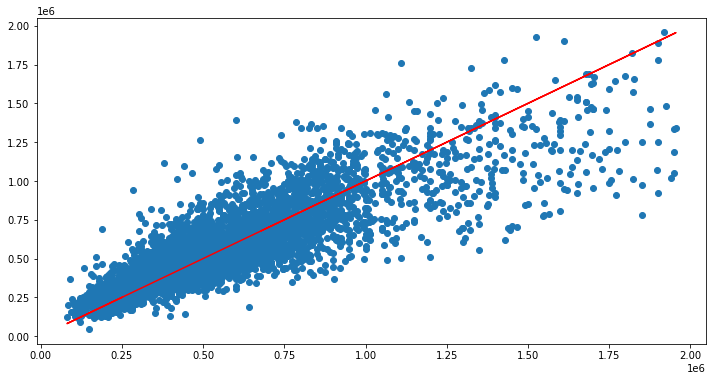

In [44]:
#The red line represents the perfect prediction line.
#We are being punished by the outlier expensive homes.
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test,y_test, 'r')

## Use the Model to Predict on a brandnew House

In [45]:
#Pick the very first house from the dataframe
single_house = df.drop('price', axis=1).iloc[0]

In [46]:
#Scale this single house data as a numpy array.
#Reshape it to be a matrix
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [47]:
model.predict(single_house)

array([[287817.7]], dtype=float32)

In [48]:
#The house is worth 221k but estimated to cost 270k.
#A difference of 50k.
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
